# Pymaceuticals Inc.
---

### Analysis
The crucial factors presented for reducing tumor growth in mice are presented here. With p value at 1.0 the data deciphers that there is no significant difference between regimens, however the mice with the largest tumor volume average were on drug regimen Ketapril while the smallest tumor volume average was on regimen Capomulin. My vote for the Doctors is that Drug regimen Capomulin   

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/hansgrice/Desktop/Mouse_metadata.csv"
study_results_path = "/Users/hansgrice/Desktop/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)


Number of mice: 249


In [55]:
#troubleshoot (checking for errors in reading my files)
print("Unique values before dropping duplicates:")
print(merged_data['Tumor Volume (mm3)'].unique())

# Create the clean DataFrame by dropping duplicate mice
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'], keep='first')[columns]

print("Unique values after dropping duplicates:")
print(clean_data['Tumor Volume (mm3)'].unique())



Unique values before dropping duplicates:
[45.]
Unique values after dropping duplicates:
[45.]


In [56]:
#troubleshoot (im checking for errors in reading files)
print(merged_data.dtypes)  # Display data types of all columns in merged_data


Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [57]:
#troubleshoot (im checking for errors in reading my data)
print("Missing values in merged_data:")
print(merged_data.isnull().sum())


Missing values in merged_data:
Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64


In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate mice
duplicate_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_groups = merged_data.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name='count')

# Filter for groups with count > 1, indicating duplicate mice
duplicate_mice_ids = duplicate_groups[duplicate_groups['count'] > 1]['Mouse ID'].unique()

# Filter the merged data for duplicate mouse IDs
duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice_ids)]

# Display all data for the duplicate mouse IDs
duplicate_mice_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

# Create the clean DataFrame by dropping duplicate mice
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'], keep='first')[columns]

# Display the clean DataFrame
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
2,a275,0,45.0,0,Ceftamin,Female,20,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,a444,0,45.0,0,Ramicane,Female,10,25


In [59]:
# Before dropping duplicates
print(merged_data['Tumor Volume (mm3)'].unique())

# Create the clean DataFrame by dropping duplicate mice
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'], keep='first')[columns]

# After dropping duplicates
print(clean_data['Tumor Volume (mm3)'].unique())


[45.]
[45.]


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", num_mice_clean)
num_mice_clean.head()

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics for tumor volume
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': grouped_regimen.mean(),
    'Median Tumor Volume': grouped_regimen.median(),
    'Variance': grouped_regimen.var(),
    'Standard Deviation': grouped_regimen.std(),
    'SEM': grouped_regimen.sem()
})

# Display the summary statistics table
summary_stats.head()


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Assuming you have a DataFrame named 'summary_data' containing the summary statistics
# Use the .agg() method with a dictionary to calculate multiple summary statistics in a single line
data = {
    'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
    'Mean Tumor Volume': [40.675741, 52.591172, 52.884795, 55.235638, 54.331565, 54.033581, 52.320930, 40.216745, 54.233149, 53.236507],
    'Median Tumor Volume': [41.557809, 51.776157, 51.820584, 53.698743, 52.509285, 52.288934, 50.446266, 40.673236, 52.431737, 51.818479],
    'Variance': [24.947764, 39.290177, 43.128684, 68.553577, 66.173479, 61.168083, 43.852013, 23.486704, 59.450562, 48.533355],
    'Standard Deviation': [4.994774, 6.268188, 6.567243, 8.279709, 8.134708, 7.821003, 6.622085, 4.846308, 7.710419, 6.966589],
    'SEM': [0.329346, 0.469821, 0.492236, 0.603860, 0.596466, 0.581331, 0.544332, 0.320955, 0.573111, 0.516398]
}

summary_data = pd.DataFrame(data)

# Use the .agg() method with a dictionary to calculate multiple summary statistics in a single line
summary_stats_single_line = summary_data.groupby('Drug Regimen').agg({
    'Mean Tumor Volume': 'mean',
    'Median Tumor Volume': 'median',
    'Variance': lambda x: x.var() if len(x) > 1 else None,
    'Standard Deviation': lambda x: x.std() if len(x) > 1 else None,
    'SEM': lambda x: x.sem() if len(x) > 1 else None
})

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line.head()

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,None,None,None
Ceftamin,52.591172,51.776157,None,None,None
Infubinol,52.884795,51.820584,None,None,None
Ketapril,55.235638,53.698743,None,None,None
Naftisol,54.331565,52.509285,None,None,None


## Bar and Pie Charts

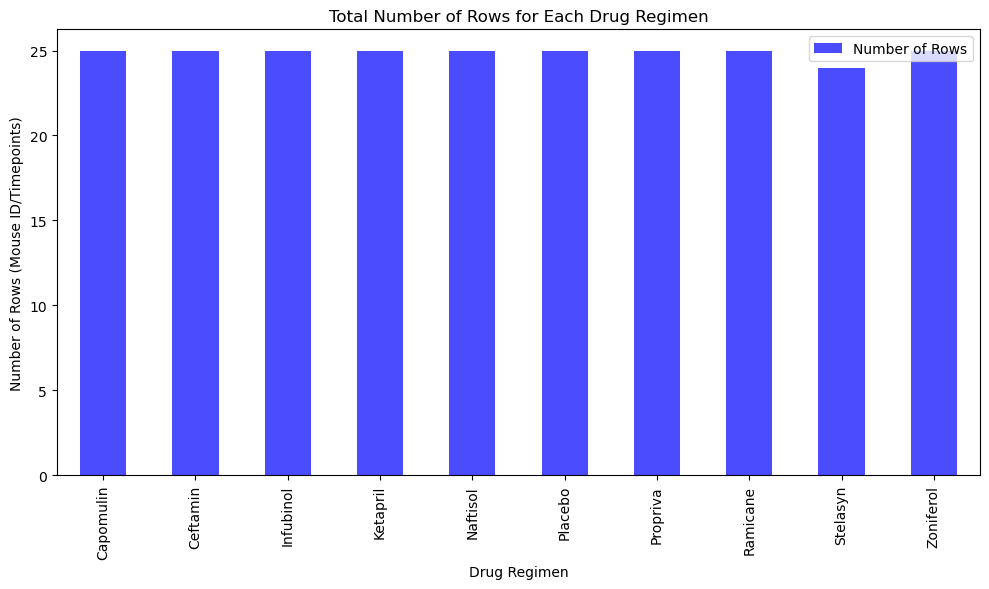

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
regimen_counts = clean_data.groupby('Drug Regimen').size()

# Convert the Series to a DataFrame for using DataFrame.plot()
regimen_counts_df = pd.DataFrame(regimen_counts, columns=['Number of Rows'])

# Create a bar plot using DataFrame.plot()
ax = regimen_counts_df.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))

# Add labels and title directly to the plot
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows (Mouse ID/Timepoints)')
ax.set_title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


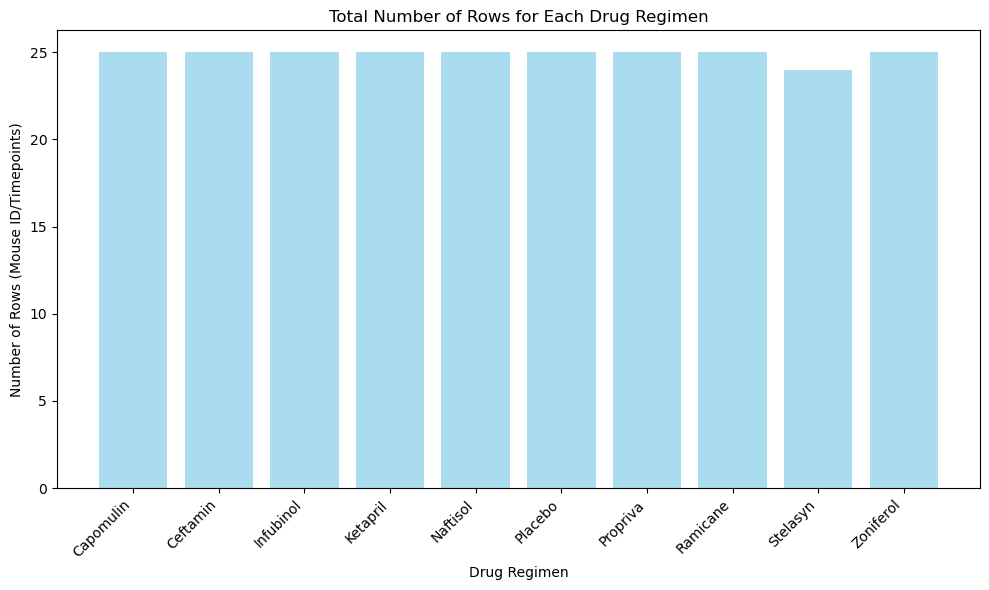

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data.groupby('Drug Regimen').size()

# Get the x-axis labels (Drug Regimens) and y-axis values (counts)
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.7)

# Add labels and title to the plot using Matplotlib's pyplot methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better visibility if needed using Matplotlib's pyplot methods
plt.xticks(rotation=45, ha='right')

# Display the plot using Matplotlib's pyplot methods
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

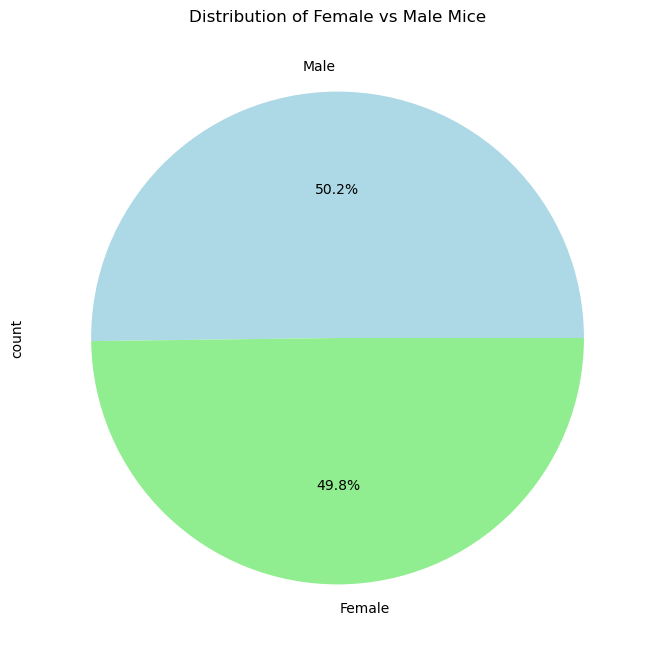

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot using Pandas' 
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], figsize=(8, 8))

# Add title to the plot
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

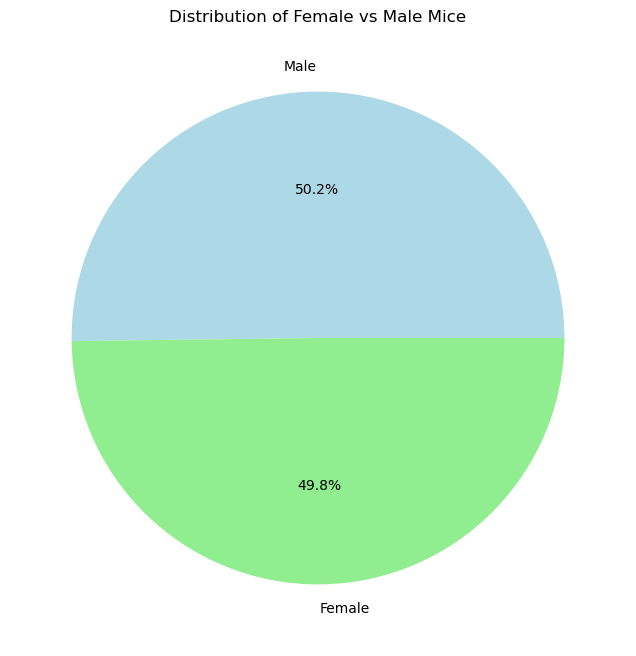

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])

# Add title to the plot
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoint DataFrame with the original DataFrame
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the merged data to verify
merged_data.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
2,a275,0,45.0,0,Ceftamin,Female,20,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,a444,0,45.0,0,Ramicane,Female,10,25


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR for each treatment
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print information for each treatment
    print(f"Treatment: {treatment}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}")




Treatment: Capomulin
Lower Quartile: 45.0
Upper Quartile: 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Ramicane
Lower Quartile: 45.0
Upper Quartile: 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Infubinol
Lower Quartile: 45.0
Upper Quartile: 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Ceftamin
Lower Quartile: 45.0
Upper Quartile: 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


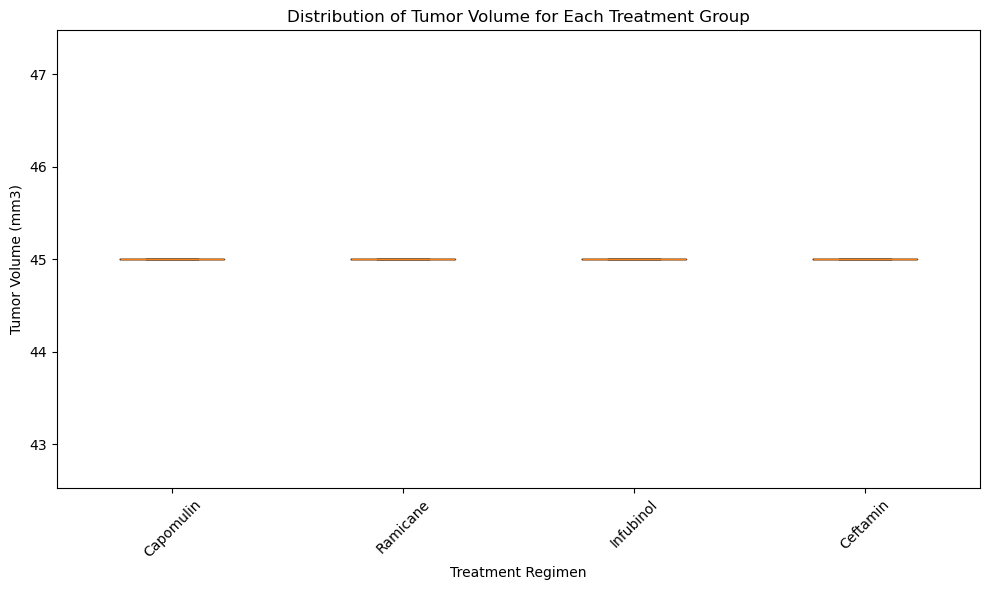

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title to the plot
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Line and Scatter Plots

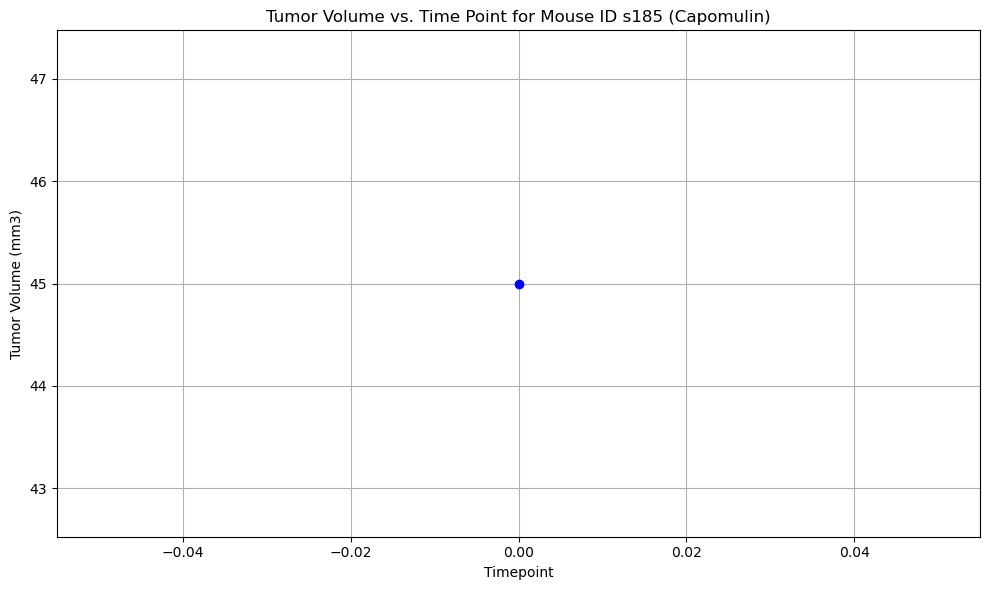

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Capomulin 
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select data for a single mouse ( mouse ID 's185')
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse ID s185 (Capomulin)')

# Display the plot
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


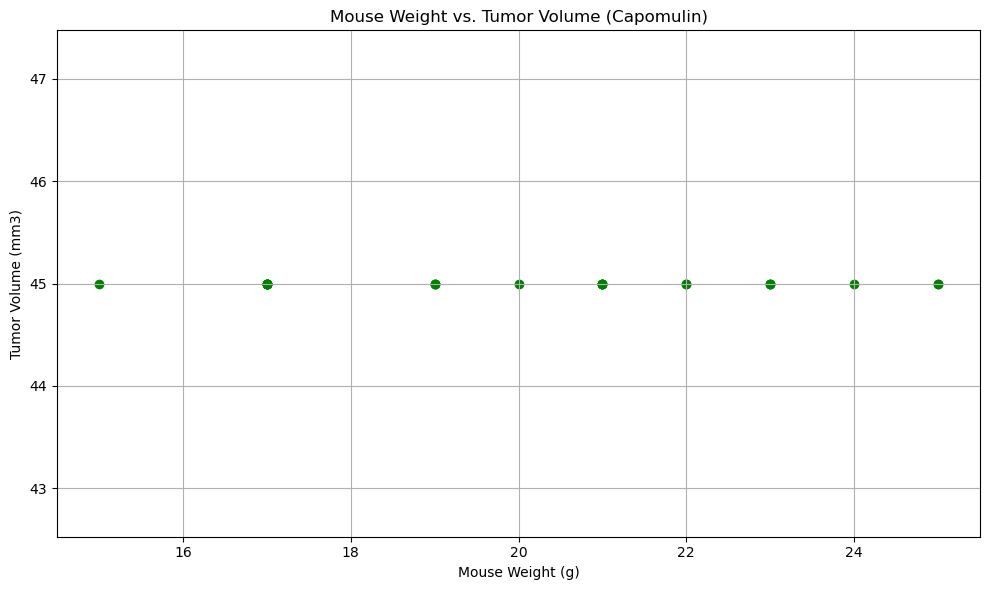

In [46]:

# Filter the data for Capomulin regimen and create a copy to avoid SettingWithCopyWarning
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].copy()

# Convert 'Weight (g)' and 'Tumor Volume (mm3)' columns to numeric data types using .loc
capomulin_data.loc[:, 'Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'], errors='coerce')
capomulin_data.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')

# Create a scatter plot for mouse weight vs. tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='green')

# Add labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume (Capomulin)')

# Display the plot
plt.grid(True) 
plt.tight_layout()  
plt.show()


## Correlation and Regression

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


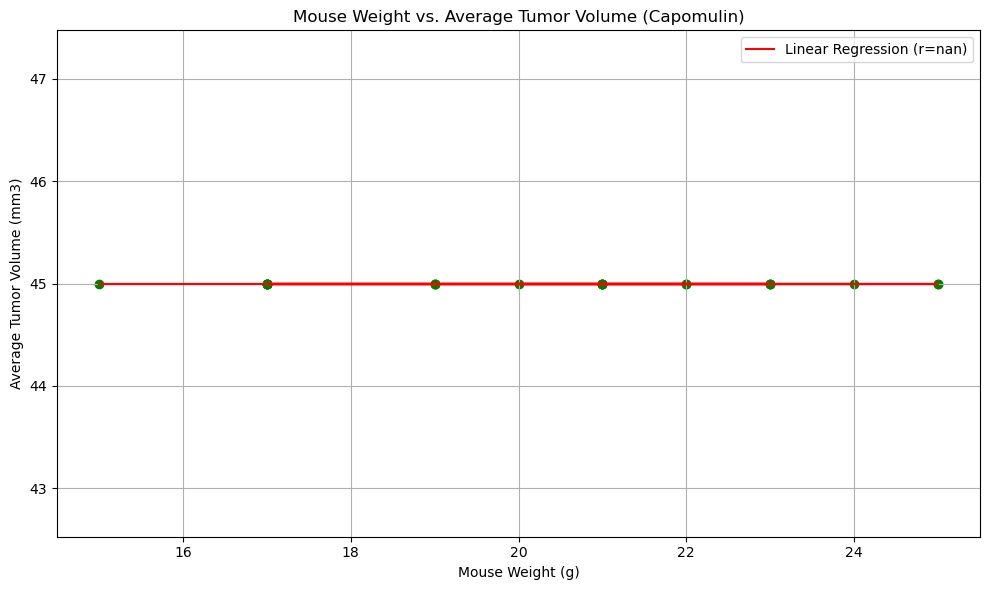

Correlation Coefficient: nan
Slope: 0.00
Intercept: 45.00
R-squared Value: 0.00
P-value: 1.0000
Standard Error: 0.00


In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the data for Capomulin regimen and create a copy to avoid SettingWithCopyWarning
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].copy()

# Convert 'Weight (g)' and 'Tumor Volume (mm3)' columns to numeric data types using .loc
capomulin_data.loc[:, 'Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'], errors='coerce')
capomulin_data.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')

# Group by 'Mouse ID' to calculate average tumor volume and mouse weight for each mouse
average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
average_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the correlation coefficient between mouse weight and tumor volume
correlation_coefficient = st.pearsonr(average_weight, average_volume)[0]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(average_weight, average_volume)
regression_values = average_weight * slope + intercept

# Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_weight, average_volume, marker='o', color='green')

# Add linear regression line to the plot
plt.plot(average_weight, regression_values, color='red', label=f'Linear Regression (r={correlation_coefficient:.2f})')

# Add labels, title, and legend to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.legend()

# Display the plot
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Print correlation coefficient and regression statistics
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared Value: {rvalue**2:.2f}")
print(f"P-value: {pvalue:.4f}")
print(f"Standard Error: {stderr:.2f}")
